In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
import numpy as np

In [38]:
negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FintuneSGD/TestNeg.csv')
pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FintuneSGD/TestPos.csv')

In [4]:
pos

,Positive
0,0.985451
1,0.999963
2,0.695997
3,0.974707
4,0.674686
...,...
195,0.653860
196,0.557514
197,0.995350
198,0.911810


In [39]:
negs['Label'] = 0
pos['Label'] = 1
negs['Positive'] = negs['Negative']

In [40]:
y = pd.concat([negs,pos])
y = y.drop(['Negative'],axis=1)

In [41]:
y.head()

,Label,Positive
0,0,0.872249
1,0,0.938196
2,0,0.464101
3,0,0.896717
4,0,0.928892


In [42]:
y.groupby('Label').mean()

,Positive
Label,
0,0.657616
1,0.857059


# Plot the two distributions

<Axes: xlabel='Positive', ylabel='Percent'>

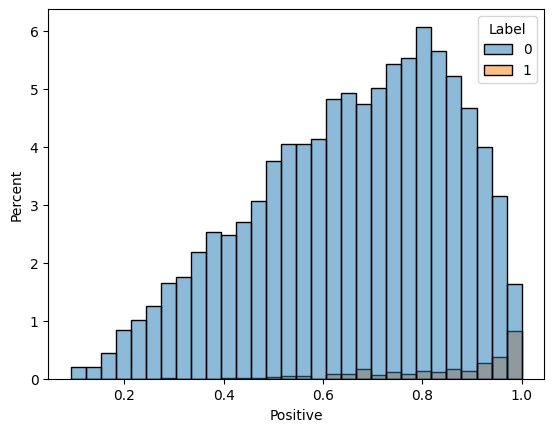

In [43]:
fig,ax = plt.subplots(1,1)
sns.histplot(y,x = 'Positive',hue='Label', stat = 'percent',ax = ax)
#ax.set_yscale('log')
#ax.set_xscale('log')

<Axes: xlabel='Positive', ylabel='Percent'>

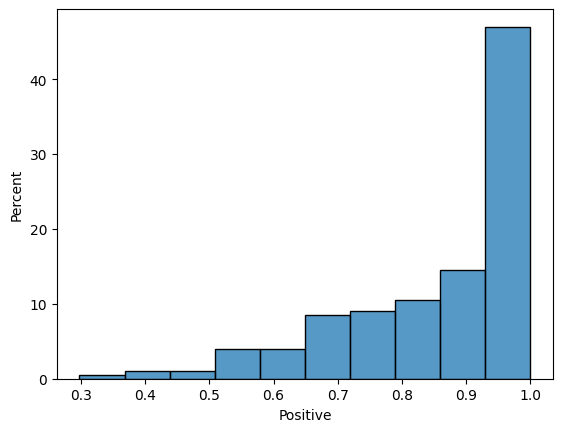

In [10]:
sns.histplot(data = y[y['Label']!= 0],x = 'Positive', stat = 'percent')

In [11]:
y.groupby('Label').mean()

,Positive
Label,
0,0.657616
1,0.857059


# Look at the precission recall curve

In [12]:
precision, recall, thresholds= precision_recall_curve(y['Label'],y['Positive'])

(0.0, 1.0)

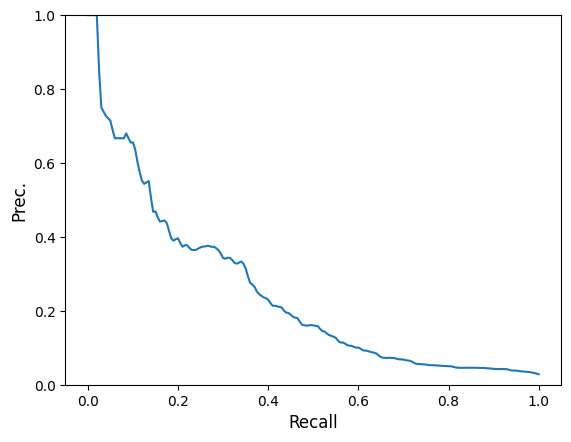

In [13]:
fig2,ax2 = plt.subplots(1)
sns.lineplot(x = recall, y = precision,ax = ax2,errorbar=None)
ax2.set_xlabel('Recall', fontsize = 12) # x-axis label with fontsize 15
ax2.set_ylabel('Prec.', fontsize = 12) # x-axis label with fontsize 15
ax2.set_ylim([0, 1])

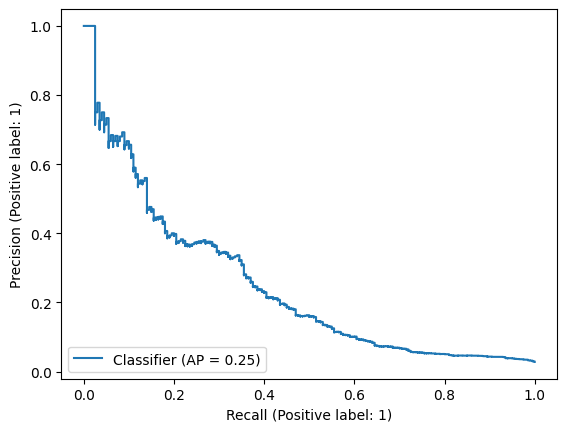

In [14]:
PrecisionRecallDisplay.from_predictions(y['Label'],y['Positive'])

In [18]:
def find_optimal_threshold(precisions, recalls, thresholds):
    """
    Given a list of precisions, recalls, and corresponding thresholds, finds the optimal threshold
    that maximizes the F1 score (harmonic mean of precision and recall).

    Args:
    - precisions (list): A list of precisions.
    - recalls (list): A list of recalls.
    - thresholds (list): A list of thresholds corresponding to the precisions and recalls.

    Returns:
    - The optimal threshold (float).
    """

    # Calculate F1 scores for each threshold
    f1_scores = [2 * (p * r) / (p + r) if p + r > 0 else 0 for p, r in zip(precisions, recalls)]

    # Find the index of the threshold with the highest F1 score
    max_index = f1_scores.index(max(f1_scores))

    # Return the corresponding threshold
    return thresholds[max_index],f1_scores[max_index]

In [19]:
def confusion_matrix(predictions, labels, threshold):
    """
    Given a list of binary predictions and labels, and a threshold value, calculates and returns the confusion matrix.

    Args:
    - predictions (list): A list of binary predictions (0 or 1).
    - labels (list): A list of binary labels (0 or 1).
    - threshold (float): The decision threshold for the predictions.

    Returns:
    - The confusion matrix as a dictionary with keys 'true_positive', 'false_positive', 'true_negative', 'false_negative'.
    """

    # Initialize the counts to zero
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    # Iterate over each prediction and label
    for pred, label in zip(predictions, labels):
        if pred >= threshold:
            if label == 1:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if label == 0:
                true_negative += 1
            else:
                false_negative += 1

    # Return the confusion matrix as a dictionary
    return {
        'true_positive': true_positive,
        'false_positive': false_positive,
        'true_negative': true_negative,
        'false_negative': false_negative
    }

In [20]:
thres,f1 = find_optimal_threshold(precision, recall, thresholds)

In [101]:
len(precision),len(recall),len(thresholds)

(7204, 7204, 7203)

### Run on test set

In [88]:
negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/GaussianMobileNet/TestNega.csv')
pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/GaussianMobileNet/TestPos.csv')

<Axes: xlabel='Positive', ylabel='Count'>

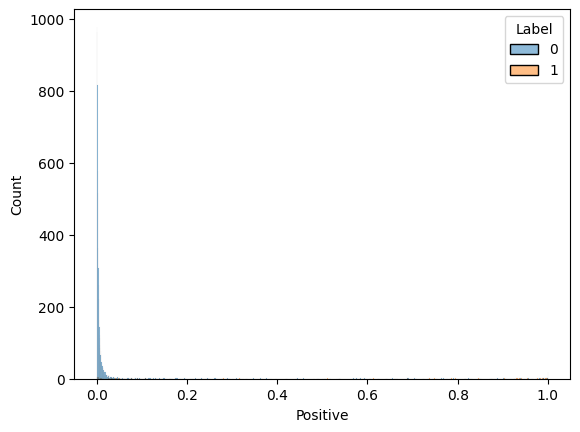

In [44]:
sns.histplot(y,x = 'Positive',hue='Label')

In [21]:
thres,f1

(0.9666607975959778, 0.3407407407407407)

In [22]:
negs['Label'] = 0
pos['Label'] = 1
negs['Positive'] = 1-negs['Negative']

y = pd.concat([negs,pos])
y = y.drop(['Negative'],axis=1)

Text(0.5, 1.0, 'Config. C')

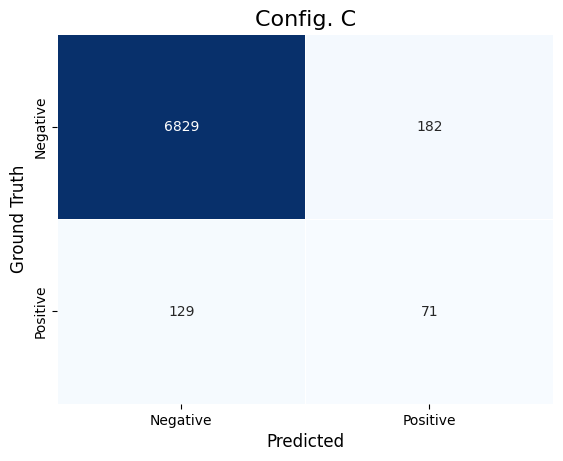

In [44]:
cm = confusion_matrix(y['Positive'],y['Label'],0.96)
cm = np.array([[cm['true_negative'],cm['false_positive']],
                [cm['false_negative'],cm['true_positive']]])

fig1,ax1 = plt.subplots(1)
sns.heatmap(cm,annot = True,
            linewidth=.5,
            fmt='g',
            cmap = 'Blues',
            cbar = False,
            xticklabels= ['Negative','Positive'],
            yticklabels= ['Negative','Positive'])

ax1.set_xlabel('Predicted', fontsize = 12) # x-axis label with fontsize 15
ax1.set_ylabel('Ground Truth', fontsize = 12) # y-axis label with fontsize 15
ax1.set_title('Config. C', fontsize = 16)

In [45]:
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)

In [46]:
s = f'Threshold:{thres}\nPrecission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Threshold:0.9666607975959778
Precission:0.28063241106719367
Recall:0.355
F1:0.31346578366445915


In [49]:
cm = np.array([[6351,659],
               [40,160]])
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)

In [50]:
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.19536019536019536
Recall:0.8
F1:0.3140333660451423
